In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Part 1: Prepare the data
Read myopia.csv into a Pandas DataFrame & Remove the "MYOPIC" column from the dataset.

Standardize the dataset so that columns that contain larger values do not influence the outcome more than columns with smaller values.

In [2]:
#Read myopia.csv into a Pandas DataFrame
myopia_df = pd.read_csv("Starter_Code/myopia.csv")
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
# Remove the "MYOPIC" column from the dataset.
myopia = myopia_df.drop(['MYOPIC'], axis=1)
myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [4]:
#Standardize your dataset into smaller values.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(myopia)

# Part 2: Apply Dimensionality Reduction
Perform dimensionality reduction with PCA. How did the number of the features change?
preserve 90% of the explained variance in dimensionality reduction.

Further reduce the dataset dimensions with t-SNE and visually inspect the results. To do this, run t-SNE on the principal components, which is the output of the PCA transformation.

Create a scatter plot of the t-SNE output. Are there distinct clusters?

In [5]:
# dimensionality reduction with PCA
pca = PCA(n_components=0.90)
pca_transformed_data = pca.fit_transform(scaled_data)

## PCA Explained Variance
Explained variance is a statistical measure of how much variation in a dataset can be attributed to each of the principal components generated by a PCA.

The larger the variance explained by a principal component, the more important that component is.

In [6]:
# pca_transformed_data variance to detect the importance of components.
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [7]:
# Run t-SNE
tsne = TSNE(learning_rate=50)
transformed_features = tsne.fit_transform(pca_transformed_data)

C:\Users\trish\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [8]:
# Check that dimensions have been reduced to two
transformed_features.shape

(618, 2)

In [9]:
myopia["X"] = transformed_features[:,0]
myopia["y"] = transformed_features[:,1]
myopia["Myopic"] = myopia_df["MYOPIC"]
myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,X,y,Myopic
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,-5.783903,5.474397,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,11.439254,4.248985,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,-2.509669,-20.427244,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,-21.242025,6.748087,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,14.078267,-8.976024,0


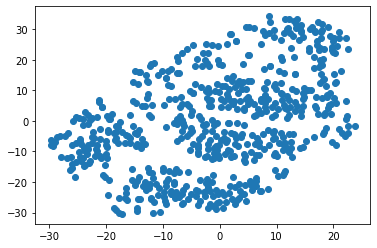

In [10]:
plt.scatter(myopia["X"], myopia["y"])
plt.show()

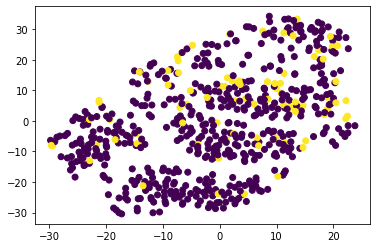

In [11]:
plt.scatter(myopia["X"], myopia["y"], c=myopia["Myopic"])
plt.show()

In [12]:
labels = myopia["Myopic"]
labels.value_counts()

0    537
1     81
Name: Myopic, dtype: int64

# Part 3: Perform a Cluster Analysis with K-means
Create an elbow plot to identify the best number of clusters. Make sure to do the following:

Use a for loop to determine the inertia for each k between 1 through 10.

If possible, determine where the elbow of the plot is, and at which value of k it appears.

In [13]:
myopia_pca_df = pd.DataFrame(data=pca_transformed_data, columns=["principal component 1", "principal component 2",
                                                                "principal component 3","principal component 4",
                                                                 "principal component 5","principal component 6",
                                                                 "principal component 7",
                                                                 "principal component 8","principal component 9",
                                                                 "principal component 10"])
myopia_pca_df.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


C:\Users\trish\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


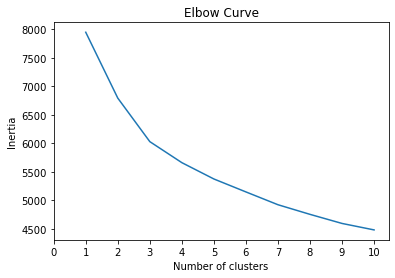

In [15]:
## Identify the best number of clusters using the Elbow
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_pca_df)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
elbow_df = pd.DataFrame(elbow_data)

plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [16]:
elbow_df.head()

,k,inertia
0,1,7948.905345
1,2,6794.415695
2,3,6031.097742
3,4,5662.587617
4,5,5376.410589


In [17]:
# Create a function that finds the k clusters using K-Means on data.
def get_clusters(k, myopia_pca_df):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(myopia_pca_df)

    # Predict clusters
    predictions = model.predict(myopia_pca_df)

    # Create return DataFrame with predicted clusters
    myopia_pca_df["myopic"] = model.labels_

    return myopia_pca_df

In [18]:
clusters = get_clusters(2, myopia_pca_df)
clusters.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,myopic
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,0
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,1
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,1
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,1
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,1


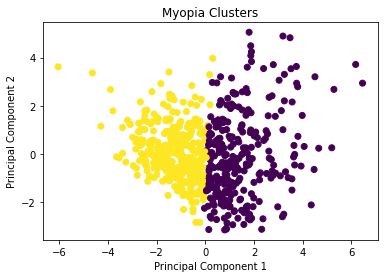

In [19]:
def clusters_show(df_myopia_pca):
    plt.scatter(df_myopia_pca['principal component 1'], df_myopia_pca['principal component 2'], 
                c=df_myopia_pca['myopic'])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Myopia Clusters')
    plt.show()
clusters_show(clusters)

# Recommendation
After preparing the data, applying Dimensionality reduction using PCA and reducing this further with t-SNE I performed a Cluster Analysis with K-Means model.  Below are my recommendations:

1. The optimal number of clusters seems to be 3

2. t-SNE was not helpful in finding clusters, there was some some difference after adjusting perplexity but this could be due to random noise.

3. Some patterns after performing the K-Means clustering but the dataset is too small to make an accurate prediction or for further splitting and training of data.

4. Suggested to get a bigger dataset and to split the data into Test and Training to test the above models and others for making more accurate predictions and clustering.

